# Test of $\eta$ calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('researchfigs')

In [2]:
plt.style.use('researchfigs')
file_name = 'test_island_evo.npz'

In [3]:
# import data
with np.load(file_name) as data:
    class_data = data['class_obj'].item()


In [4]:
class_data.keys()

dict_keys(['file_name', 'D', 'K', 'M', 'gamma', 'thresh', 'epoch_time', 'epoch_num', 'dt', 'seed', 'sample_time', 'N', 'm', 'epoch_steps', 'sample_num', 'V', 'n0', 'x0', 'increment', 'V1', 'K1', 'n_mean_ave_list', 'n2_mean_ave_list', 'n_cross_mean_list', 'mig_mean_list', 'eta_mean_list', 'eta_from_antisymmetric', 'lambda_mean_ave_list', 'n_mean_std_list', 'n2_mean_std_list', 'lambda_mean_std_list', 'autocorr_list', 'n_init_list', 'extinct_time_array', 'corr_tvec'])

(array([121.,  18.,  20.,  17.,   8.,   9.,   3.,   2.,   0.,   2.]),
 array([0.        , 0.00344742, 0.00689484, 0.01034226, 0.01378968,
        0.0172371 , 0.02068451, 0.02413193, 0.02757935, 0.03102677,
        0.03447419]),
 <a list of 10 Patch objects>)

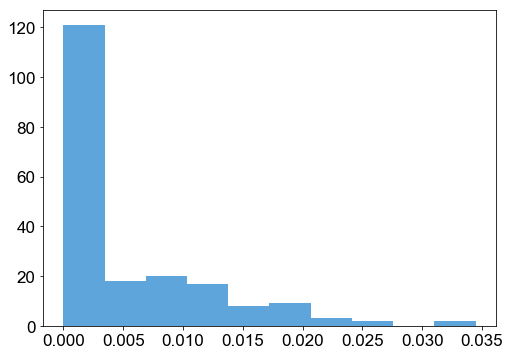

In [5]:
plt.hist(class_data['n_mean_ave_list'][-1])

In [6]:
class_data['mig_mean_list']

[array([205.74576243,  56.46313805,  22.42359963,  58.81235422,
                 nan,  47.93668684,  97.56326505,          nan,
        372.82018845,  61.97388266,  66.27362207,  59.87494362,
        173.96898306,  40.97394123, 393.4813894 ,  46.91412263,
        279.26034037, 304.42099427, 330.13966122,  57.68420924,
                 nan,          nan, 202.4454705 ,  27.56688701,
         41.71911177,  30.73069751, 574.55404444,  83.23063333,
        109.37676591,   8.23247709, 168.02585246,  91.53099337,
         41.98810329, 111.2279337 ,  60.03582945,          nan,
        245.42897688, 206.70733402,  32.06595333,  23.4067887 ,
                 nan,  56.10102907,  96.86761132,          nan,
         28.19858831,          nan,  52.23373409, 139.79197858,
        169.27109223, 237.11796877, 143.84433351, 104.72673366,
         25.90519848, 360.9337666 ,          nan,  30.95535929,
                 nan,  35.12504126, 181.55462885,  31.40530788,
         36.80705836, 229.50120887,     

In [5]:
eta_antisym = class_data['eta_from_antisymmetric']
eta_mig = np.zeros(len(eta_antisym))
for i,eta_mig_T in enumerate(class_data['eta_mean_list']):
    eta_mig += eta_mig_T
eta_mig = eta_mig/len(class_data['eta_mean_list'])

In [6]:
eta_mig = (class_data['eta_mean_list'][-1]+class_data['eta_mean_list'][-2])/2

Below we plot the distribution of $\eta$ given by computing the fixed point of $(V-V^{T})/2$. $\eta$
is distributed as a Gaussian.

Text(0.5,1.03,'Distribution of $\\eta$ (antisym calculation)')

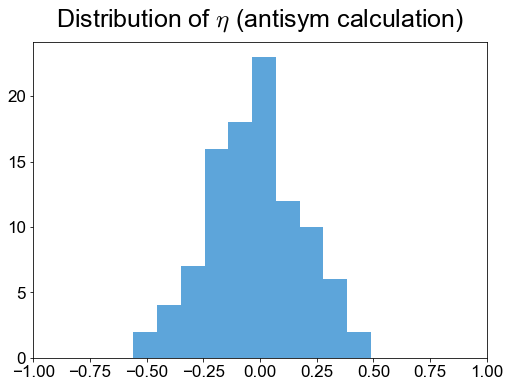

In [7]:
plt.figure()
plt.hist(eta_antisym)
plt.xlim((-1,1))
plt.title('Distribution of $\eta$ (antisym calculation)',y=1.03)

Below are the $\eta$ computed using $\langle n \rangle$, $V$, and $\langle\bar{n}/n \rangle$.

Text(0.5,1.03,'Distribution of $\\eta$ (migration calculation)')

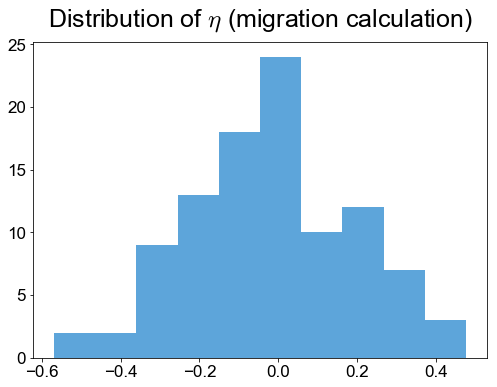

In [8]:
plt.figure()
plt.hist(eta_mig[~np.isnan(eta_mig)])
#plt.xlim((-1,1))
plt.title('Distribution of $\eta$ (migration calculation)',y=1.03)

Below we plot the comparison between the two ways of computing $\eta$. The deviations are well within
those expected due to the difference between $V$ and the antisymmetric part of $V$.

Text(0.5,1.03,'Migration vs. fixed pt. computation of $\\eta$')

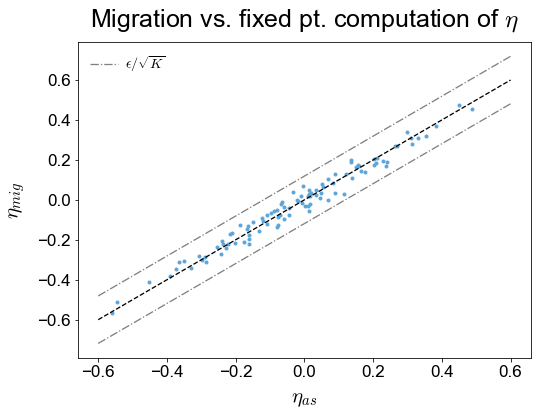

In [12]:
plt.plot(eta_antisym,eta_mig,ls='None',marker='.')
# y = x line
plt.plot(np.linspace(-0.6,0.6,50),np.linspace(-0.6,0.6,50),ls='--',color='k')
# error bars
epsilon = np.sqrt(1-class_data['gamma'])

plt.plot(np.linspace(-0.6,0.6,50),
         np.linspace(-0.6,0.6,50)+np.sqrt(epsilon/len(eta_antisym)),ls='-.',
         color='grey',label='$\epsilon/\sqrt{K}$')
plt.plot(np.linspace(-0.6,0.6,50),np.linspace(-0.6,0.6,50)-np.sqrt(epsilon/len(eta_antisym)),ls='-.',
         color='grey')

plt.legend()

plt.ylabel('$\eta_{mig}$')
plt.xlabel('$\eta_{as}$')
plt.title('Migration vs. fixed pt. computation of $\eta$',y=1.03)

Text(0.5,1.03,'Migration vs. fixed pt. computation of $\\eta$')

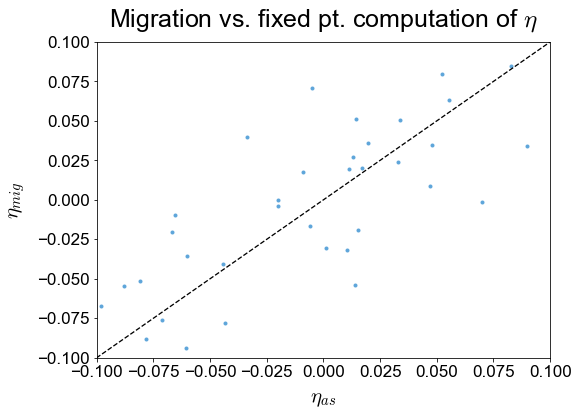

In [13]:
plt.plot(eta_antisym,eta_mig,ls='None',marker='.')
# y = x line
plt.plot(np.linspace(-0.2,0.6,50),np.linspace(-0.2,0.6,50),ls='--',color='k')
# error bars
epsilon = np.sqrt(1-class_data['gamma'])

#plt.plot(np.linspace(-0.2,0.6,50),
#         np.linspace(-0.2,0.6,50)+np.sqrt(epsilon/len(eta_antisym)),ls='-.',
#         color='grey',label='$\epsilon/\sqrt{K}$')
#plt.plot(np.linspace(-0.05,0.6,50),np.linspace(-0.05,0.6,50)-np.sqrt(epsilon/len(eta_antisym)),ls='-.',
#         color='grey')

plt.xlim((-0.1,0.1))
plt.ylim((-0.1,0.1))
#plt.legend()

plt.ylabel('$\eta_{mig}$')
plt.xlabel('$\eta_{as}$')
plt.title('Migration vs. fixed pt. computation of $\eta$',y=1.03)

# SCRATCH

127 out of 200 survive


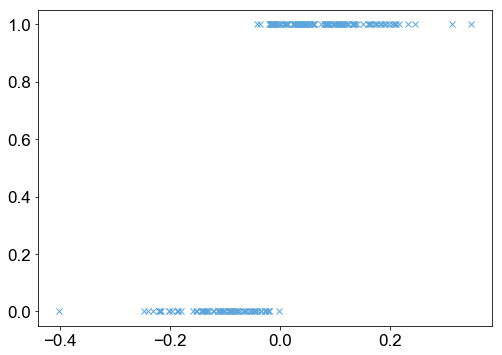

In [17]:
# survival probability vs. antisymmetric $\eta$
surv_prob = np.array([~np.isfinite(t_ext) for t_ext in class_data['extinct_time_array']])
plt.figure()
plt.plot(eta_antisym,surv_prob,ls='None', marker='x')

print('{} out of {} survive'.format(np.sum(surv_prob),len(surv_prob)))

In [18]:
# survival CDF
sort_idx = np.argsort(eta_antisym)
surv_CDF = np.zeros(len(sort_idx))

surv_CDF[0] = surv_prob[sort_idx[0]]

for i,idx in enumerate(sort_idx[1:]):
    surv_CDF[i+1] = surv_CDF[i]+surv_prob[idx]


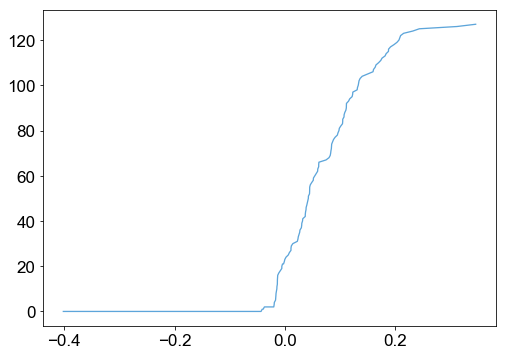

In [20]:
plt.plot(np.sort(eta_antisym),surv_CDF)

In [ ]:
# survival probability vs. antisymmetric $\eta$
surv_prob = [~np.isfinite(t_ext) for t_ext in class_data['extinct_time_array']]
plt.figure()
plt.plot(eta_antisym,surv_prob,ls='None', marker='x')

print('{} out of {} survive'.format(np.sum(surv_prob),len(surv_prob)))

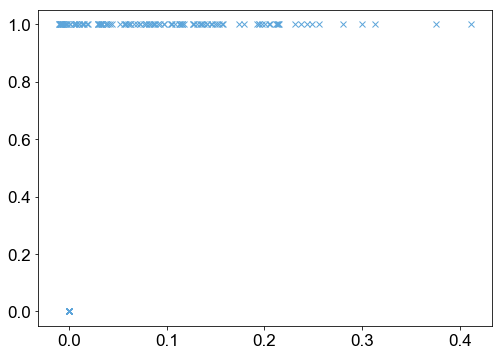

In [14]:
plt.figure()
plt.plot(eta_mig,surv_prob,ls='None', marker='x')


In [15]:
class_data['extinct_time_array']

array([           inf,            inf,            inf,            inf,
        7353.30000001,            inf,            inf,  7375.00000001,
       18177.50000002,            inf,            inf,            inf,
                  inf,            inf, 15703.10000004,            inf,
                  inf, 21904.49999996, 13087.20000003,            inf,
        6610.70000001,  8898.10000001,            inf,            inf,
                  inf,            inf, 10437.80000002,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,  8750.70000001,
                  inf,            inf,            inf,            inf,
        7260.30000001,            inf,            inf,  7794.10000001,
                  inf,  4103.3       ,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf, 27367.79999988,  8694.40000001,            inf,
      

In [16]:
eta_antisym

array([-3.70389360e-02,  1.11713426e-01,  1.88023244e-01,  4.26772365e-02,
       -1.28807770e-01,  4.62593767e-02,  3.87118680e-02, -1.39707115e-01,
       -4.58236695e-02,  4.49927340e-02,  3.05792881e-02,  5.16123416e-02,
        1.63722217e-05,  8.47774034e-02, -5.55150848e-02,  4.07526293e-02,
       -1.93594466e-02, -6.11230926e-02, -9.09476854e-02,  4.87826503e-02,
       -1.33763363e-01, -1.32841267e-01, -1.34183053e-02,  8.36692189e-02,
        4.51520492e-02,  9.89059338e-02, -8.61866840e-02,  6.34892053e-03,
        1.11848432e-02,  2.03439151e-01, -4.15285084e-03,  3.26009049e-02,
        2.08553822e-01, -1.35753431e-02,  3.71647226e-02, -1.07779445e-01,
       -9.59469137e-04, -1.64308438e-02,  9.53378654e-02,  1.05088028e-01,
       -1.50467085e-01,  8.44251103e-02,  5.67825719e-02, -1.42826632e-01,
        1.33942861e-01, -2.47402271e-01,  8.24012332e-02, -1.28736274e-02,
       -8.29838314e-03, -1.50906703e-02,  1.18684983e-02,  1.11464265e-02,
        1.74103117e-01, -